<a href="https://colab.research.google.com/github/renatossilva/DoctoralThesis/blob/main/trab_Renato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and stuff

## Universal Libraries

In [ ]:
import pandas as pd
import numpy as np

## Accessing Drive folder

In [ ]:
from google.colab import drive
file = '/content/drive/'
drive.mount(file)

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Tese/AI_tests

/content/drive/My Drive/Tese/AI_tests


## Auxiliary Functions

### For Example 1

In [ ]:
# x: List (Path ID's)
def extract_list(x): 
  return [int(y.strip()) for y in x.split(sep='|')]


# x: List (Path ID's)
# df_values: Pandas DataFrame (Path ID's x Trust Value)
def convert_values(x, df_values):
  return [df_values.loc[y][0] for y in x]


# df: Pandas DataFrame (Main DataFrame)
# from_col: Column name (List of Trust Values)
def create_features(df, from_col):
  df['Min'] = df[from_col].apply(np.min)
  df['Max'] = df[from_col].apply(np.max)
  df['Median'] = df[from_col].apply(np.median)

# df: Pandas Dataframe(Main DataFrame)
# df_values: Pandas DataFrame (Path ID's x Trust Value)
def create_final_frame(df, df_values, path_col):
  df['Path_list'] = df[path_col].apply(extract_list)
  df['Val_list'] = df['Path_list'].apply(convert_values, df_values=df_values)
  
  create_features(df, 'Val_list')
  df['Path_init'] = 

  return df

SyntaxError: ignored

# Example

## Example 1

### Creating Data Frames

In [ ]:
ex_df = pd.DataFrame()
ex_df['Nome'] = ['abc', 'def', 'ghi']
ex_df['Path'] = [
                '120 | 320 | 440 | 570',
                '555 | 333',
                '777 | 72  | 441 '
                ]
ex_df['X1'] = [1, 2, 5] 
ex_df

,Nome,Path,X1
0,abc,120 | 320 | 440 | 570,1
1,def,555 | 333,2
2,ghi,777 | 72 | 441,5


In [ ]:
ex_df2 = pd.DataFrame()
ex_df2['Key'] = [120, 320, 440, 570, 555, 333, 777, 72, 441] 
ex_df2['Val'] = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
ex_df2.set_index('Key', inplace=True)
ex_df2

,Val
Key,
120,0.2
320,0.3
440,0.4
570,0.5
555,0.6
333,0.7
777,0.8
72,0.9
441,1.0


### Creating new features

Transformando o path numa lista de identificadores

In [ ]:
ex_df['Path'].apply(extract_list)

NameError: ignored

In [ ]:
ex_df['Path_list'] = ex_df['Path'].apply(extract_list)
ex_df

NameError: ignored

Convertendo a lista de id's de caminho para os valores da segunda tabela

In [ ]:
ex_df['Val_list'] = ex_df['Path_list'].apply(convert_values, df_values=ex_df2)
ex_df

Convertendo a lista de valores em features:

In [ ]:
create_features(ex_df, 'Val_list')
ex_df

Tudo de uma vez

In [ ]:
df = create_final_frame(ex_df, ex_df2, 'Path')
df

## Example 2

### Creating DataFrame

In [ ]:
import random

In [ ]:
ex2_df = pd.DataFrame()

ex2_df['Anomaly'] = random.choices([True, False], k=100)
ex2_df['Repetitions'] = random.choices(range(1, 5), k=100)
ex2_df['Length'] = random.choices(range(1, 10), k=100)
ex2_df['Trust'] = [round(random.uniform(0,0.2), 8) for i in range(100)]
ex2_df['Relevance'] = [round(random.uniform(0,1), 4) for i in range(100)]

In [ ]:
ex2_df

,Anomaly,Repetitions,Length,Trust,Relevance
0,False,4,2,0.035878,0.8759
1,True,4,8,0.130648,0.9106
2,False,4,5,0.064093,0.2639
3,False,4,8,0.161099,0.9275
4,False,1,9,0.023504,0.2126
...,...,...,...,...,...
95,False,3,9,0.188173,0.9201
96,True,4,4,0.178367,0.6863
97,False,1,8,0.186418,0.0216
98,False,1,4,0.128683,0.4562


In [ ]:
ex2_df.describe()

,Repetitions,Length,Trust,Relevance
count,100.000000,100.000000,100.000000,100.000000
mean,2.600000,4.980000,0.096933,0.472972
std,1.145919,2.628438,0.054326,0.302099
min,1.000000,1.000000,0.000479,0.002300
25%,2.000000,3.000000,0.053859,0.208975
50%,3.000000,4.000000,0.094630,0.451550
75%,4.000000,8.000000,0.138256,0.744000
max,4.000000,9.000000,0.196259,0.994700


### Plotting 

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import seaborn as sns

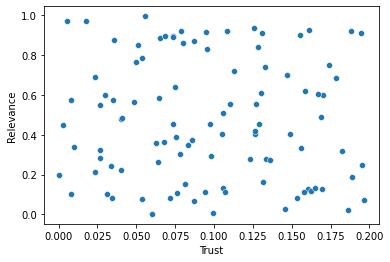

In [ ]:
sns.scatterplot(x='Trust', y='Relevance', data=ex2_df)

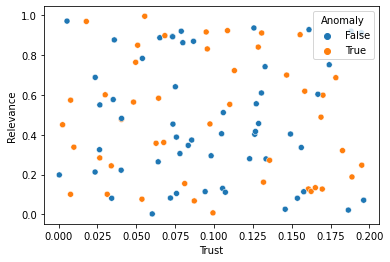

In [ ]:
sns.scatterplot(x='Trust', y='Relevance', data=ex2_df, hue='Anomaly')

Distributions

In [ ]:
def plot_CCDF(df, lst_names, log=False):
  sns.set(rc={'figure.figsize':(12,8)}, font_scale=1.2)
  for name in lst_names:
    series_ecdf = ECDF(np.sort(np.array(df[name])))
    plt.plot(series_ecdf.x, (1-series_ecdf.y), label=name)
  if log:
    plt.xscale('log')
    plt.yscale('log')
  plt.ylabel('CCDF')
  xmin, xmax = plt.xlim()
  #plt.xlim((1, xmax))
  plt.legend(loc='upper right')
  plt.tight_layout()

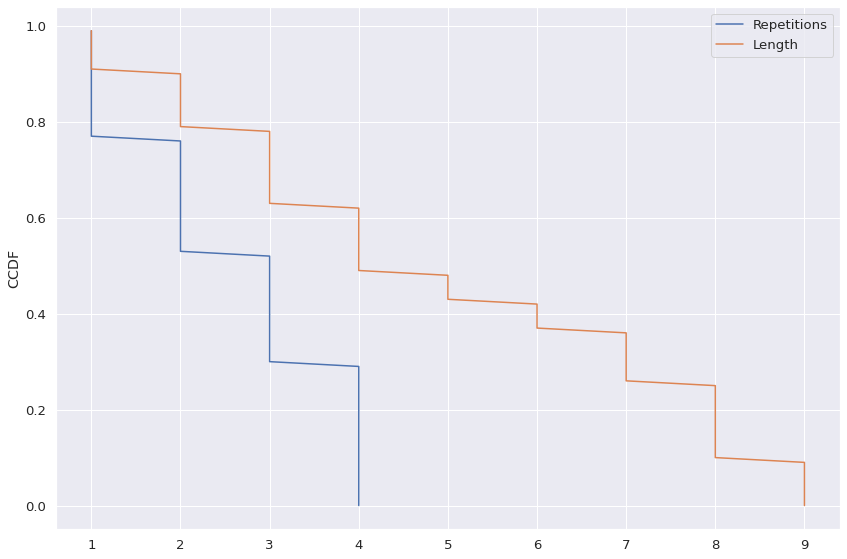

In [ ]:
plot_CCDF(ex2_df, ['Repetitions', 'Length'])

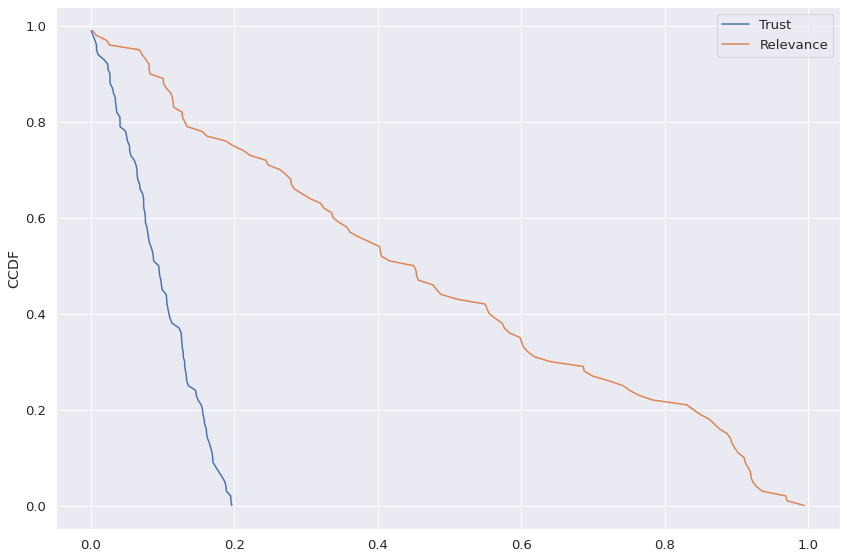

In [ ]:
plot_CCDF(ex2_df, ['Trust', 'Relevance'])

Clusters

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
X = ex2_df.loc[:, ['Trust', 'Relevance']].values

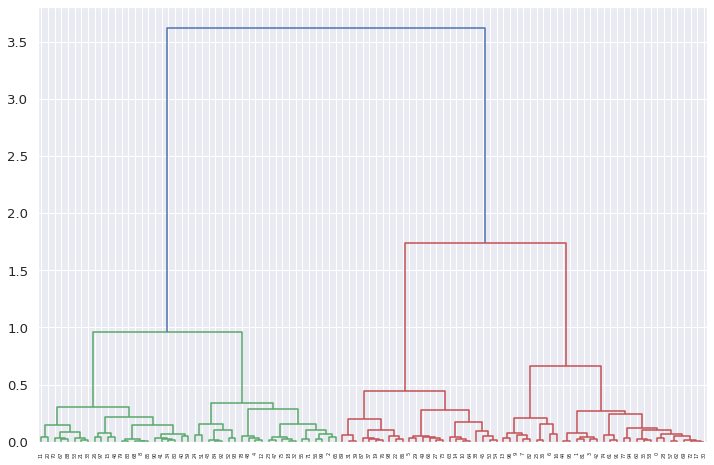

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [ ]:
n_cluster = 4
model = AgglomerativeClustering(n_clusters=n_cluster, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [ ]:
ex2_df['Cluster_Labels'] = labels

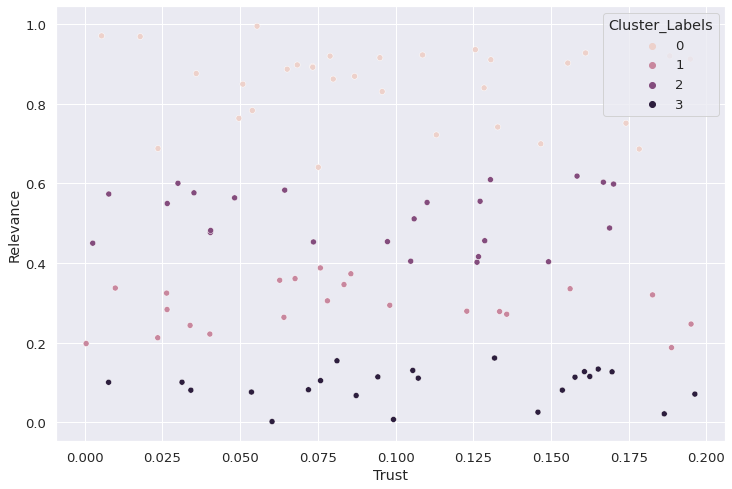

In [ ]:
sns.scatterplot(x='Trust', y='Relevance', data=ex2_df, hue='Cluster_Labels')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_scaled = ex2_df[['Trust', 'Relevance', 'Repetitions', 'Length']].values
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_scaled)

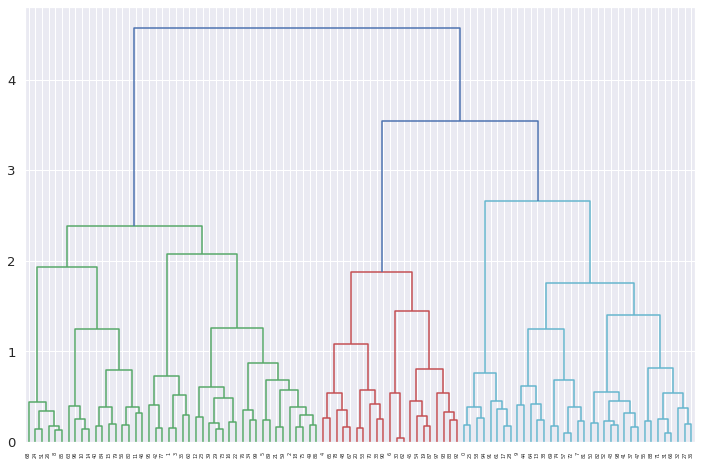

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

In [ ]:
n_cluster = 4
model = AgglomerativeClustering(n_clusters=n_cluster, affinity='euclidean', linkage='ward')
model.fit(X_scaled)
labels = model.labels_

In [ ]:
ex2_df['Cluster_Scaeld_Labels'] = labels

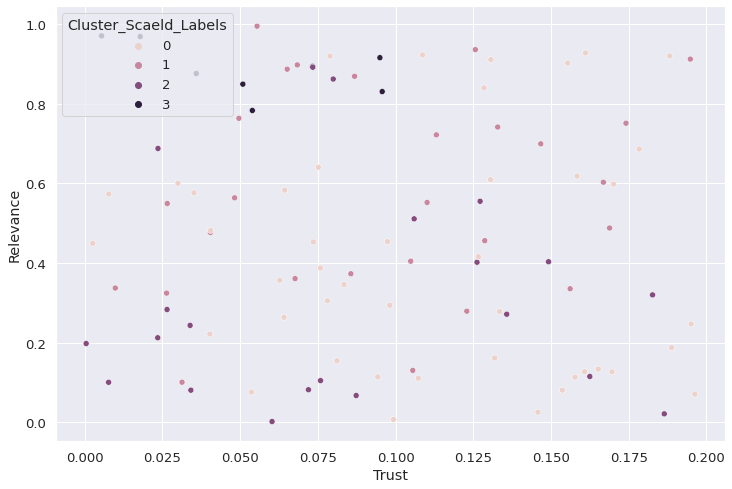

In [ ]:
sns.scatterplot(x='Trust', y='Relevance', data=ex2_df, hue='Cluster_Scaeld_Labels')

# Exploratory Data Analysis

## Loading data

In [ ]:
# Data
file_name = ['Normal_20011207_12-15_full.io', 'CodeRed_20011907_12-15_full.io']
col_names = ['relatorio', 'time', 'BPG_type', 'anomaly', 'AS_peer', 'relevance_peer', 'threat_peer', 'AS_origin', 'relevance', 'relevance_avg', 'relevance_median', 'relevance_max', 'relevance_min', 'threat', 'threat_avg', 'threat_median', 'threat_max', 'threat_min', 'repetitions', 'length', 'origin_type']
df_0 = pd.read_csv(file_name[0], sep='|', names=col_names)
df_1 = pd.read_csv(file_name[1], sep='|', names=col_names)
df = pd.concat([df_0, df_1])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df['time'] = pd.to_datetime(df['time'], format='%m/%d/%y %H:%M:%S')
df[['IGP', 'EGP', 'Incomplete']] = pd.get_dummies(df['origin_type'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122166 entries, 0 to 78483
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   relatorio         122166 non-null  object        
 1   time              122166 non-null  datetime64[ns]
 2   BPG_type          122166 non-null  object        
 3   anomaly           122166 non-null  int64         
 4   AS_peer           122166 non-null  int64         
 5   relevance_peer    122166 non-null  float64       
 6   threat_peer       122166 non-null  float64       
 7   AS_origin         122166 non-null  object        
 8   relevance         122166 non-null  float64       
 9   relevance_avg     122166 non-null  float64       
 10  relevance_median  122166 non-null  float64       
 11  relevance_max     122166 non-null  float64       
 12  relevance_min     122166 non-null  float64       
 13  threat            122166 non-null  float64       
 14  threa

In [ ]:
df

,relatorio,time,BPG_type,anomaly,AS_peer,relevance_peer,threat_peer,AS_origin,relevance,relevance_avg,relevance_median,relevance_max,relevance_min,threat,threat_avg,threat_median,threat_max,threat_min,repetitions,length,origin_type,IGP,EGP,Incomplete
0,BGP4MP,2001-07-12 12:04:59,A,0,513,0.000302,0.0,808,0.000090,0.027984,0.000639,0.111111,0.000090,0.000000e+00,5.673859e-06,0.000639,0.111111,0.000090,0,5,2,0,0,1
1,BGP4MP,2001-07-12 12:04:59,A,0,513,0.000302,0.0,81,0.001086,0.014434,0.001086,0.028571,0.000302,3.497090e-08,5.943361e-06,0.001086,0.028571,0.000302,0,4,0,1,0,0
2,BGP4MP,2001-07-12 12:04:59,A,0,513,0.000302,0.0,1580,0.000086,0.001028,0.000108,0.005208,0.000000,0.000000e+00,1.758475e-07,0.000108,0.005208,0.000000,0,6,2,0,0,1
3,BGP4MP,2001-07-12 12:04:59,A,0,513,0.000302,0.0,1580,0.000086,0.001028,0.000108,0.005208,0.000000,0.000000e+00,1.758475e-07,0.000108,0.005208,0.000000,0,6,2,0,0,1
4,BGP4MP,2001-07-12 12:04:59,A,0,513,0.000302,0.0,9486,0.000079,0.018371,0.000081,0.111111,0.000079,1.525879e-06,4.118367e-06,0.000081,0.111111,0.000079,2,6,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78479,BGP4MP,2001-07-19 15:21:16,A,1,6893,0.000478,0.0,19077,0.000014,0.015091,0.000478,0.071429,0.000014,0.000000e+00,1.114295e-06,0.000478,0.071429,0.000014,0,5,0,1,0,0
78480,BGP4MP,2001-07-19 15:21:16,A,1,6893,0.000478,0.0,19077,0.000014,0.015091,0.000478,0.071429,0.000014,0.000000e+00,1.114295e-06,0.000478,0.071429,0.000014,0,5,0,1,0,0
78481,BGP4MP,2001-07-19 15:21:16,A,1,6893,0.000478,0.0,19077,0.000014,0.015091,0.000478,0.071429,0.000014,0.000000e+00,1.114295e-06,0.000478,0.071429,0.000014,0,5,0,1,0,0
78482,BGP4MP,2001-07-19 15:21:16,A,1,6893,0.000478,0.0,19077,0.000014,0.015091,0.000478,0.071429,0.000014,0.000000e+00,1.114295e-06,0.000478,0.071429,0.000014,0,5,0,1,0,0


## Data Analysis

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def plot_CCDF(df, lst_names, label, log=False):
  sns.set(rc={'figure.figsize':(12,8)}, font_scale=1.2)
  for name in lst_names:
    series_ecdf = ECDF(np.sort(np.array(df[name])))
    plt.plot(series_ecdf.x, (1-series_ecdf.y), label = name+' - '+label)
  if log:
    plt.xscale('log')
    plt.yscale('log')
  plt.ylabel('CCDF')
  xmin, xmax = plt.xlim()
  #plt.xlim((1, xmax))
  plt.legend(loc='upper right')
  plt.tight_layout()

### CCDFs

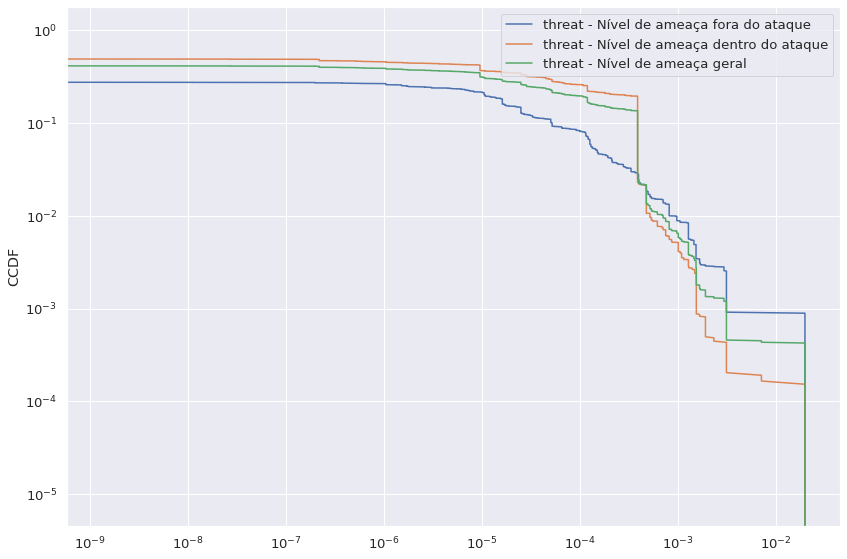

In [ ]:

plot_CCDF(df[df['anomaly']==False], ['threat'], 'Nível de ameaça fora do ataque', True)
plot_CCDF(df[df['anomaly']==True], ['threat'], 'Nível de ameaça dentro do ataque', True)
plot_CCDF(df, ['threat'], 'Nível de ameaça geral', True)



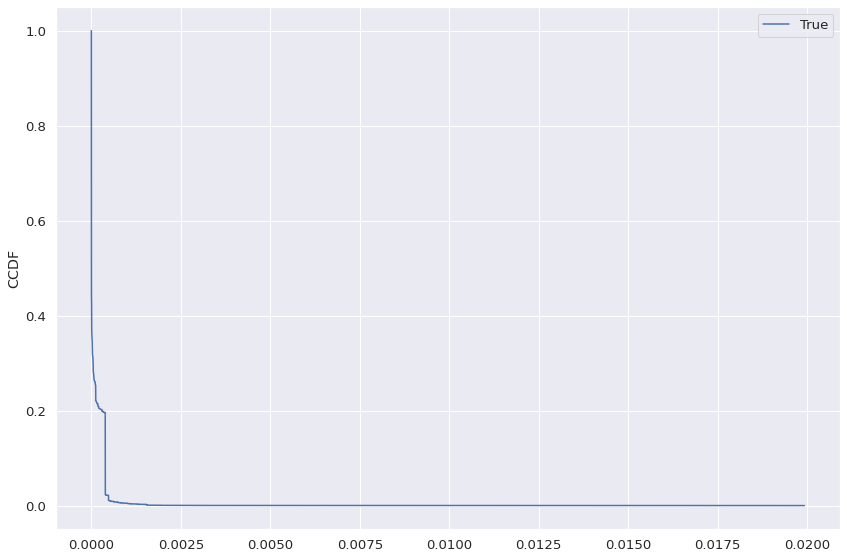

In [ ]:
X = df['anomaly'] == True
plot_CCDF(df[X], ['threat'], True)

In [ ]:
df[X]

,relatorio,time,BPG_type,anomaly,AS_peer,relevance_peer,threat_peer,AS_origin,relevance,relevance_avg,relevance_median,relevance_max,relevance_min,threat,threat_avg,threat_median,threat_max,threat_min,repetitions,length,origin_type,IGP,EGP,Incomplete
0,BGP4MP,2001-07-19 12:06:26,A,1,559,0.000405,0.000004,8670,0.000122,0.002142,0.000405,0.005208,0.000014,0.000000,0.000010,0.000405,0.005208,0.000014,0,6,0,1,0,0
1,BGP4MP,2001-07-19 12:06:26,A,1,559,0.000405,0.000004,702,0.005208,0.001519,0.000405,0.005208,0.000000,0.000001,0.000001,0.000405,0.005208,0.000000,0,4,0,1,0,0
2,BGP4MP,2001-07-19 12:06:26,A,1,559,0.000405,0.000004,702,0.005208,0.001519,0.000405,0.005208,0.000000,0.000001,0.000001,0.000405,0.005208,0.000000,0,4,0,1,0,0
3,BGP4MP,2001-07-19 12:06:26,A,1,559,0.000405,0.000004,702,0.005208,0.001519,0.000405,0.005208,0.000000,0.000001,0.000001,0.000405,0.005208,0.000000,0,4,0,1,0,0
4,BGP4MP,2001-07-19 12:06:26,A,1,559,0.000405,0.000004,702,0.005208,0.001519,0.000405,0.005208,0.000000,0.000001,0.000001,0.000405,0.005208,0.000000,0,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78479,BGP4MP,2001-07-19 15:21:16,A,1,6893,0.000478,0.000000,19077,0.000014,0.015091,0.000478,0.071429,0.000014,0.000000,0.000001,0.000478,0.071429,0.000014,0,5,0,1,0,0
78480,BGP4MP,2001-07-19 15:21:16,A,1,6893,0.000478,0.000000,19077,0.000014,0.015091,0.000478,0.071429,0.000014,0.000000,0.000001,0.000478,0.071429,0.000014,0,5,0,1,0,0
78481,BGP4MP,2001-07-19 15:21:16,A,1,6893,0.000478,0.000000,19077,0.000014,0.015091,0.000478,0.071429,0.000014,0.000000,0.000001,0.000478,0.071429,0.000014,0,5,0,1,0,0
78482,BGP4MP,2001-07-19 15:21:16,A,1,6893,0.000478,0.000000,19077,0.000014,0.015091,0.000478,0.071429,0.000014,0.000000,0.000001,0.000478,0.071429,0.000014,0,5,0,1,0,0


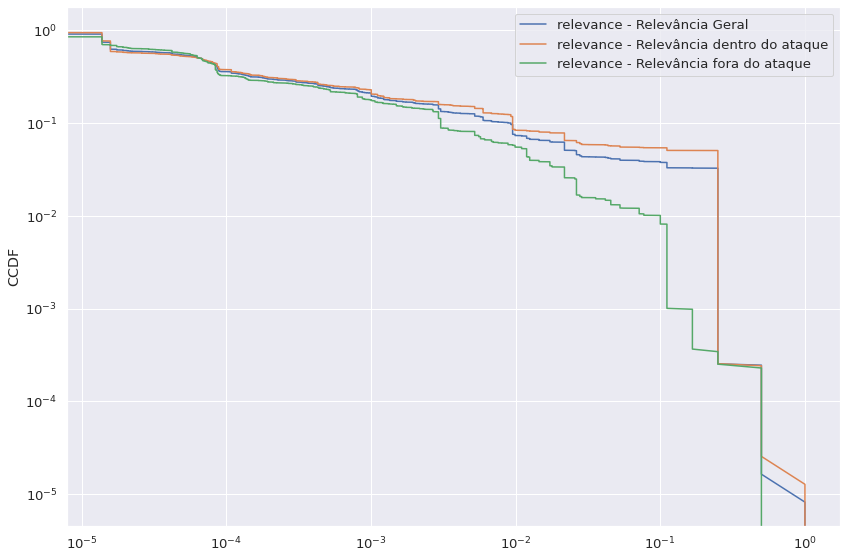

In [ ]:
plot_CCDF(df, ['relevance'], 'Relevância Geral', True)
plot_CCDF(df[df['anomaly']==True], ['relevance'], 'Relevância dentro do ataque',True)
plot_CCDF(df[df['anomaly']==False], ['relevance'], 'Relevância fora do ataque',True)

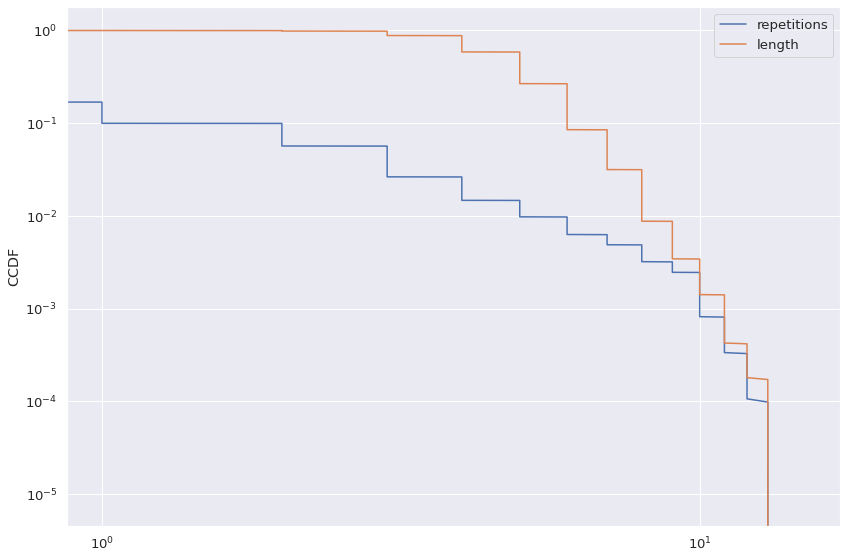

In [ ]:
plot_CCDF(df, ['repetitions', 'length'], True)

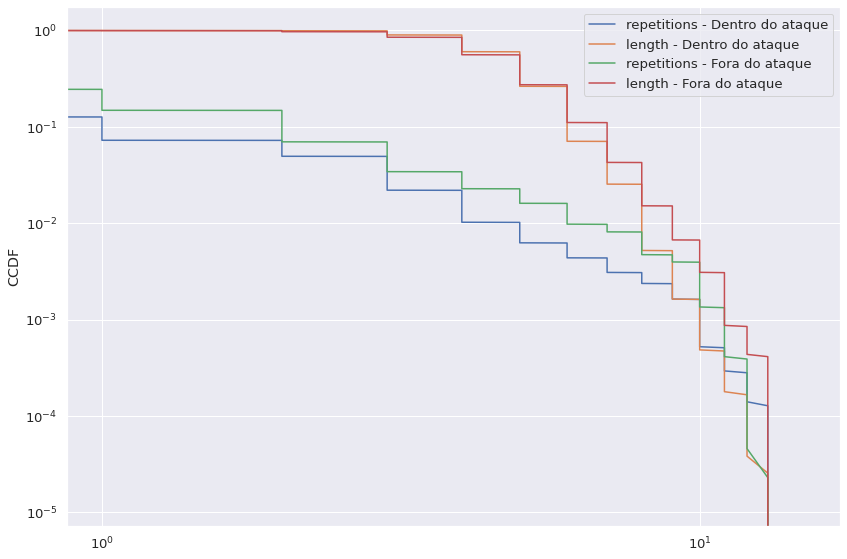

In [ ]:
plot_CCDF(df[df['anomaly']==True], ['repetitions', 'length'], 'Dentro do ataque', True)
plot_CCDF(df[df['anomaly']==False], ['repetitions', 'length'], 'Fora do ataque', True)

### Density plots

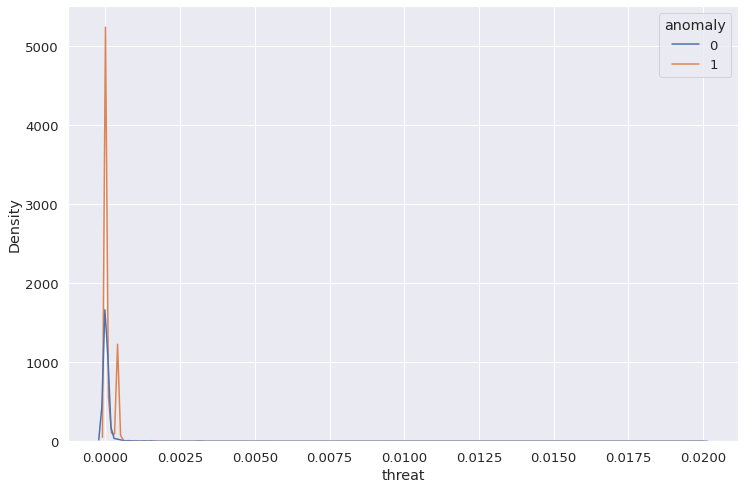

In [ ]:
sns.kdeplot(data=df, x="threat", hue='anomaly')

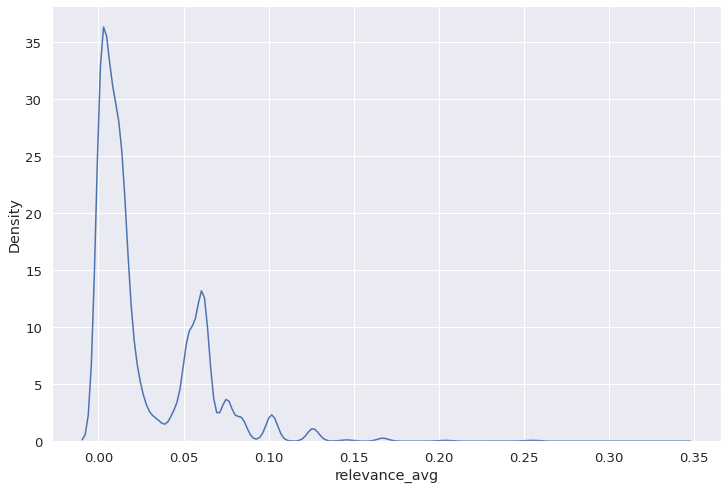

In [ ]:
sns.kdeplot(data=df[df['anomaly']==True], x="relevance_avg")

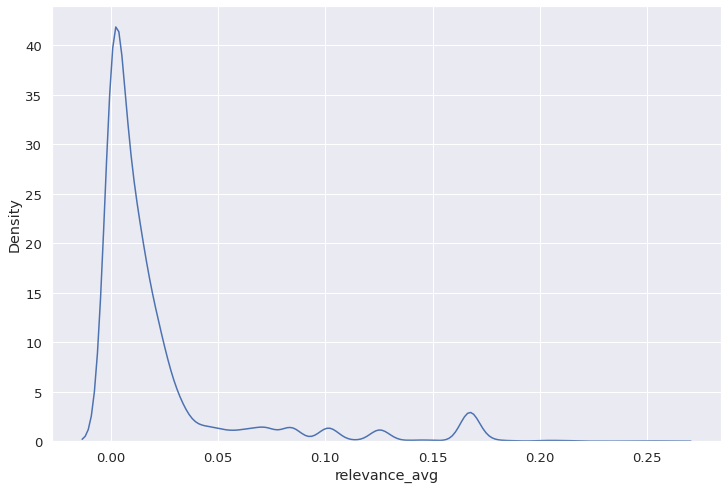

In [ ]:
sns.kdeplot(data=df[df['anomaly']==False], x="relevance_avg")

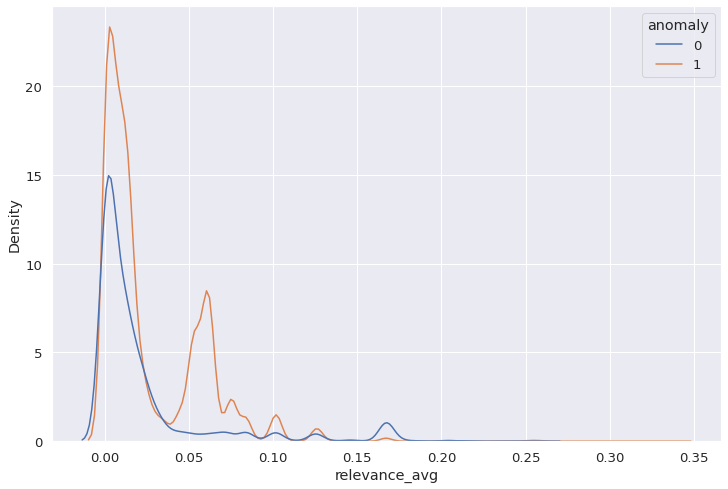

In [ ]:
sns.kdeplot(data=df, x="relevance_avg", hue='anomaly')

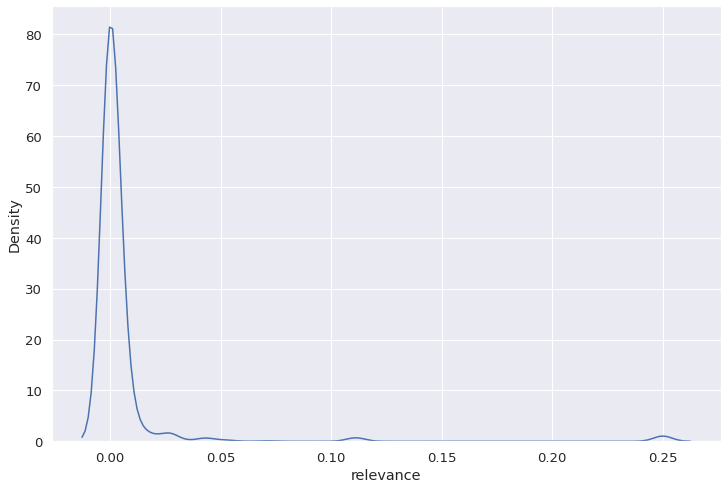

In [ ]:
sns.kdeplot(data=df[df['anomaly']==True], x="relevance")

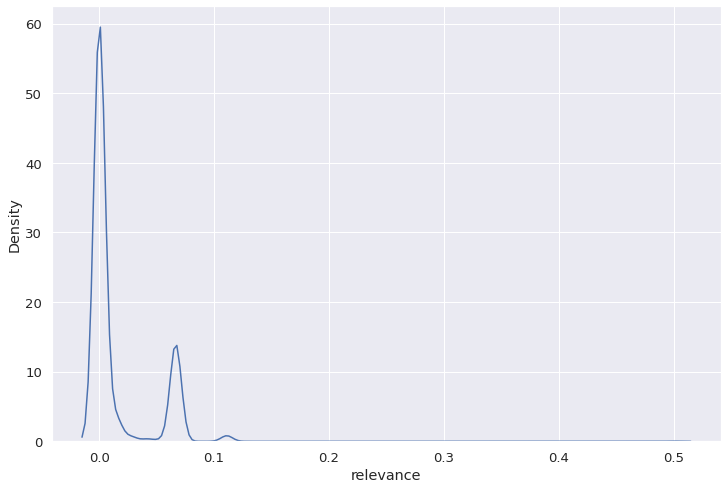

In [ ]:
sns.kdeplot(data=df[df['anomaly']==False], x="relevance")

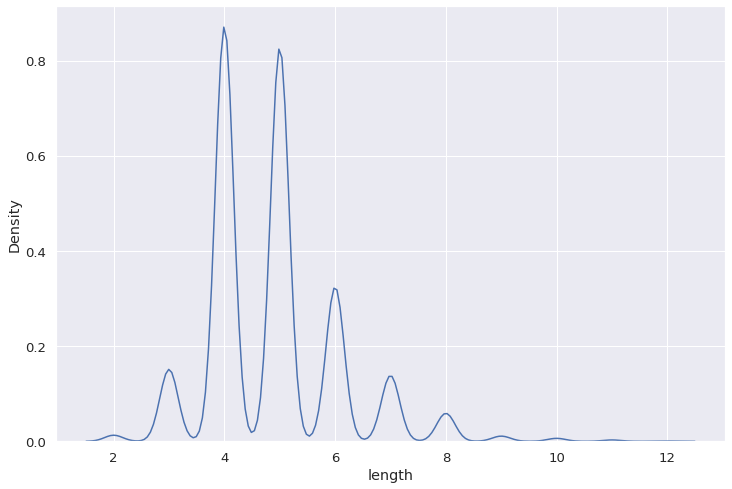

In [ ]:
sns.kdeplot(data=df, x="length")

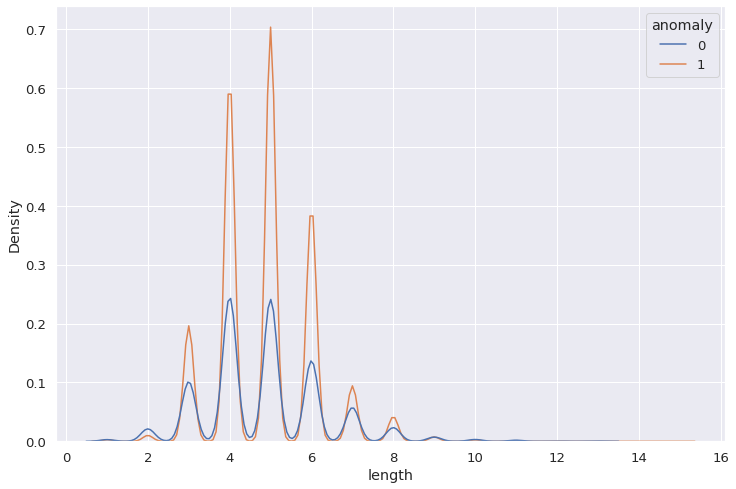

In [ ]:
sns.kdeplot(data=df, x="length", hue='anomaly')

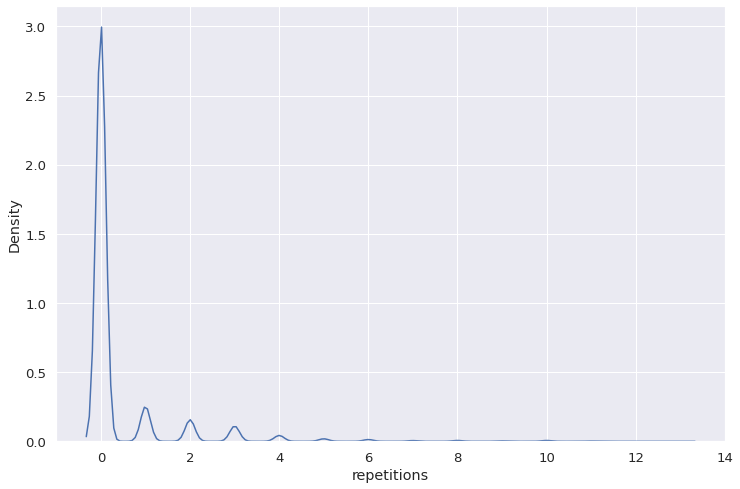

In [ ]:
sns.kdeplot(data=df, x="repetitions")

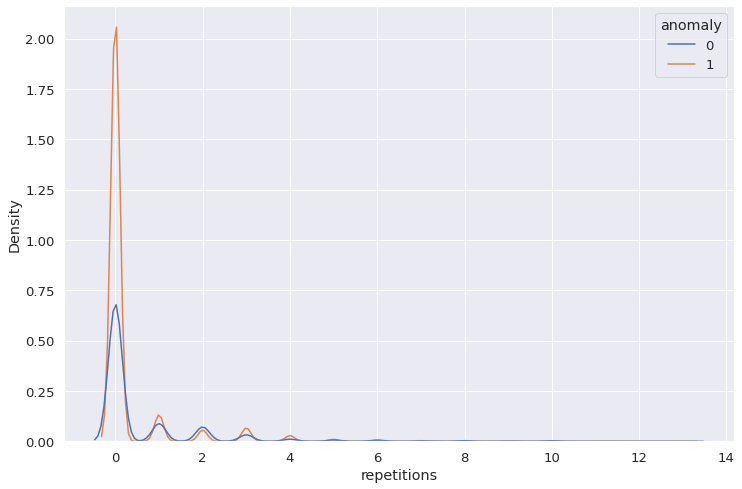

In [ ]:
sns.kdeplot(data=df, x="repetitions", hue='anomaly')

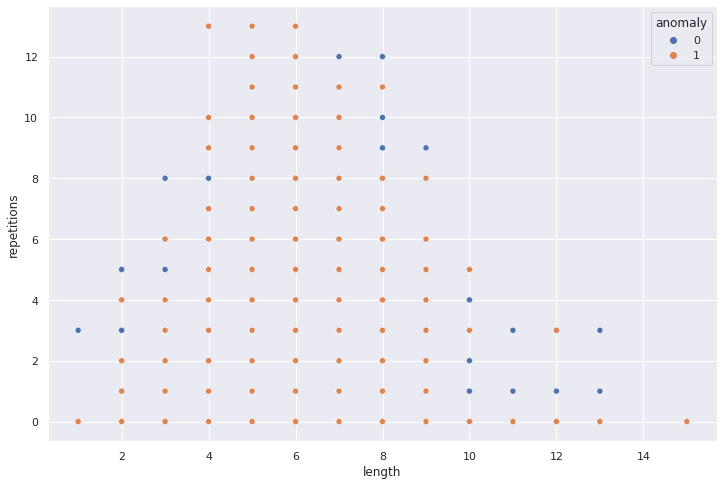

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})
g = sns.scatterplot(x='length', y='repetitions', data=filtered, hue='anomaly', alpha=1)


In [ ]:
Q1_threat = df['threat'].quantile(0.25)
Q3_threat = df['threat'].quantile(0.75)
IQR_threat = Q3_threat - Q1_threat

In [ ]:
Q1_rel = df['relevance'].quantile(0.25)
Q3_rel = df['relevance'].quantile(0.75)
IQR_rel = Q3_rel - Q1_rel

In [ ]:
filtered = df.query('(@Q1_threat - 1.5 * @IQR_threat) <= threat <= (@Q3_threat + 1.5 * @IQR_threat)')

In [ ]:
filtered = filtered.query('(@Q1_rel - 1.5 * @IQR_rel) <= relevance <= (@Q3_rel + 1.5 * @IQR_rel)')

In [ ]:
filtered

,relatorio,time,BPG_type,anomaly,AS_peer,AS_origin,relevance,relevance_avg,relevance_median,relevance_max,relevance_min,threat,threat_avg,threat_median,threat_max,threat_min,repetitions,length,origin_type
0,BGP4MP,2001-07-12 12:04:59,A,0,513,808,0.000090,0.027984,0.000639,0.111111,0.000090,0.000000e+00,5.673859e-06,0.000639,0.111111,0.000090,0,5,2
1,BGP4MP,2001-07-12 12:04:59,A,0,513,81,0.001086,0.014434,0.001086,0.028571,0.000302,3.497090e-08,5.943361e-06,0.001086,0.028571,0.000302,0,4,0
2,BGP4MP,2001-07-12 12:04:59,A,0,513,1580,0.000086,0.001028,0.000108,0.005208,0.000000,0.000000e+00,1.758475e-07,0.000108,0.005208,0.000000,0,6,2
3,BGP4MP,2001-07-12 12:04:59,A,0,513,1580,0.000086,0.001028,0.000108,0.005208,0.000000,0.000000e+00,1.758475e-07,0.000108,0.005208,0.000000,0,6,2
4,BGP4MP,2001-07-12 12:04:59,A,0,513,9486,0.000079,0.018371,0.000081,0.111111,0.000079,1.525879e-06,4.118367e-06,0.000081,0.111111,0.000079,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78479,BGP4MP,2001-07-19 15:21:16,A,1,6893,19077,0.000014,0.015091,0.000478,0.071429,0.000014,0.000000e+00,1.114295e-06,0.000478,0.071429,0.000014,0,5,0
78480,BGP4MP,2001-07-19 15:21:16,A,1,6893,19077,0.000014,0.015091,0.000478,0.071429,0.000014,0.000000e+00,1.114295e-06,0.000478,0.071429,0.000014,0,5,0
78481,BGP4MP,2001-07-19 15:21:16,A,1,6893,19077,0.000014,0.015091,0.000478,0.071429,0.000014,0.000000e+00,1.114295e-06,0.000478,0.071429,0.000014,0,5,0
78482,BGP4MP,2001-07-19 15:21:16,A,1,6893,19077,0.000014,0.015091,0.000478,0.071429,0.000014,0.000000e+00,1.114295e-06,0.000478,0.071429,0.000014,0,5,0


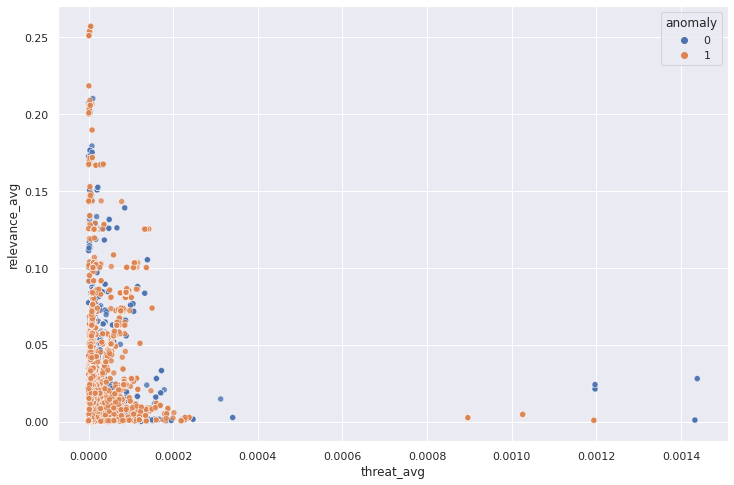

In [ ]:
g = sns.scatterplot(x='threat_avg', y='relevance_avg', data=filtered, hue='anomaly', alpha=0.8)

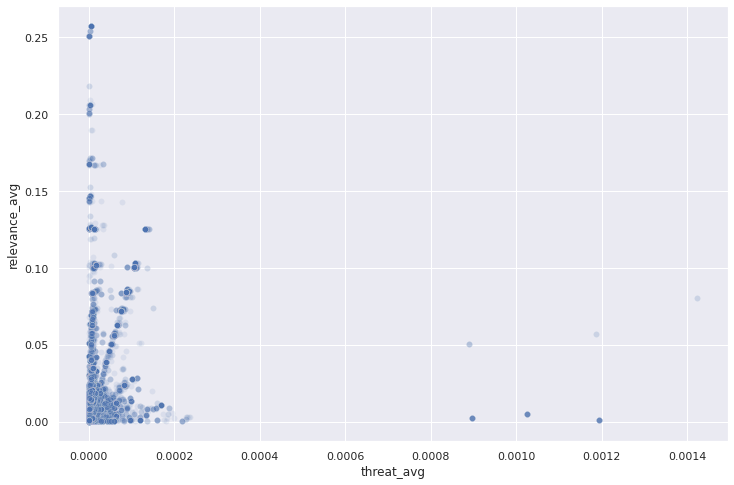

In [ ]:
g = sns.scatterplot(x='threat_avg', y='relevance_avg', data=filtered[filtered['anomaly']==True], alpha=0.1)

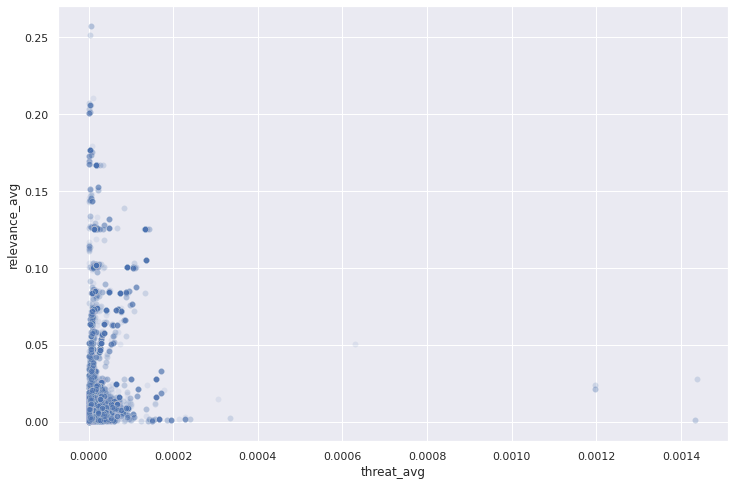

In [ ]:
g = sns.scatterplot(x='threat_avg', y='relevance_avg', data=filtered[filtered['anomaly']==False], alpha=0.1)

## Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


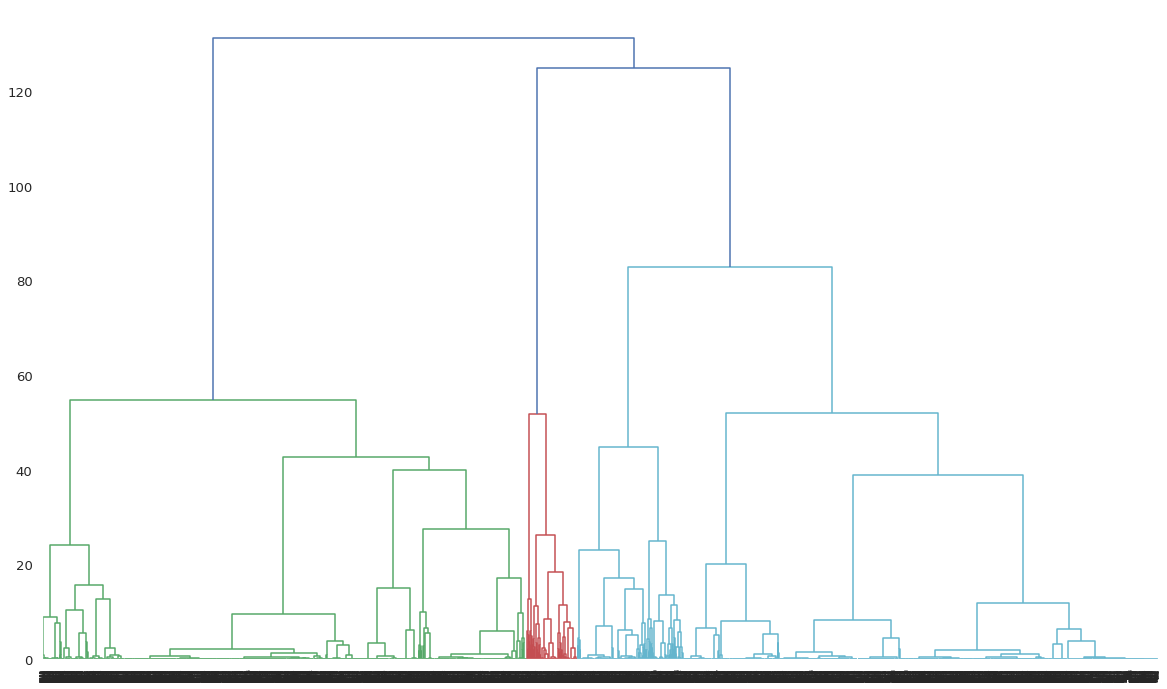

In [ ]:
X = df.loc[:, ['threat','threat_avg','threat_median', 'threat_max', 'threat_min', 'relevance', 'relevance_avg', 'relevance_median', 'relevance_max', 'relevance_min', 'length', 'repetitions', 'relevance_peer', 'threat_peer', 'IGP', 'EGP', 'Incomplete']].values
X_sample = X[np.random.choice(X.shape[0], 10000, replace=False), :]
dendrogram = sch.dendrogram(sch.linkage(X_sample, method='ward'))
plt.rcParams['figure.figsize'] = (20, 12)

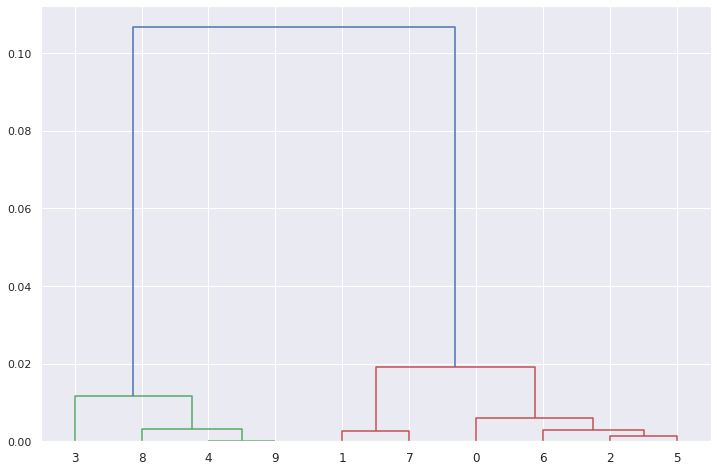

In [ ]:
X = df[df['anomaly']==True].loc[:, ['threat_avg', 'relevance_avg']].values
X_sample = X[np.random.choice(X.shape[0], 2000, replace=False), :]
dendrogram = sch.dendrogram(sch.linkage(X_sample, method='ward'))

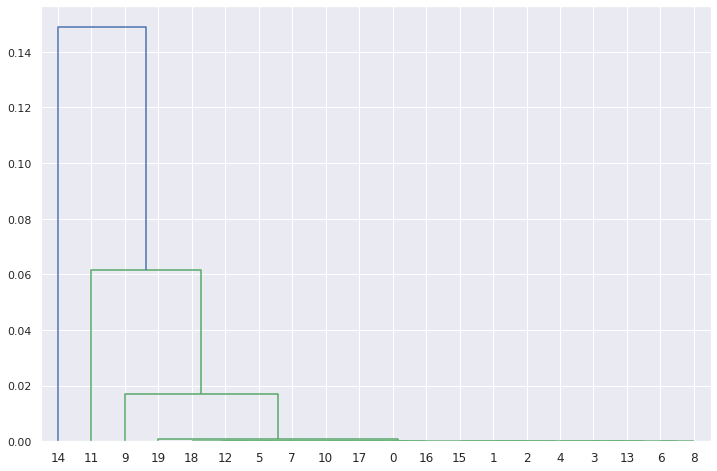

In [ ]:
X = df[df['anomaly']==False].loc[:, ['threat', 'relevance']].values
X_sample = X[np.random.choice(X.shape[0], 20, replace=False), :]
dendrogram = sch.dendrogram(sch.linkage(X_sample, method='ward'))

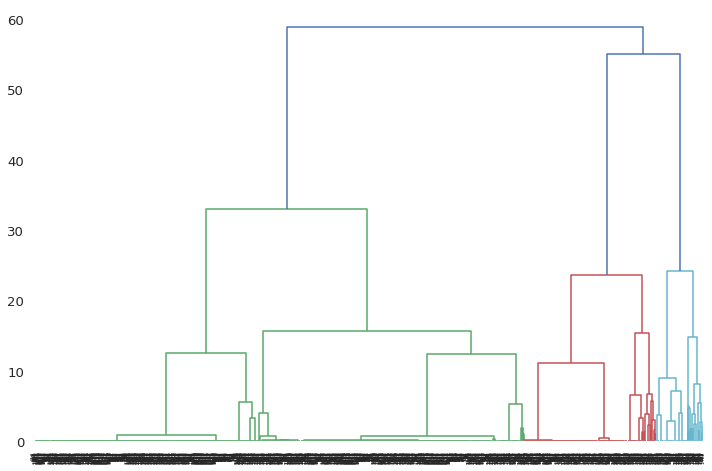

In [ ]:
X = df.loc[:, ['trust', 'relevance', 'length', 'repetitions']].values
X_sample = X[np.random.choice(X.shape[0], 2000, replace=False), :]
dendrogram = sch.dendrogram(sch.linkage(X_sample, method='ward'))

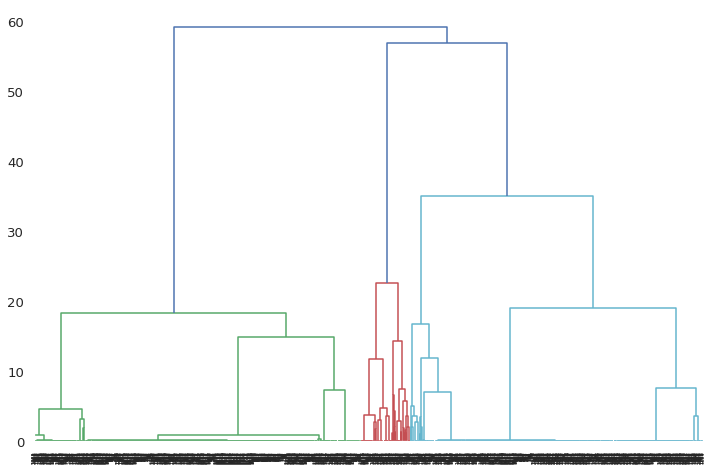

In [ ]:
X = df[df['anomaly']==True].loc[:, ['trust', 'relevance', 'length', 'repetitions']].values
X_sample = X[np.random.choice(X.shape[0], 2000, replace=False), :]
dendrogram = sch.dendrogram(sch.linkage(X_sample, method='ward'))

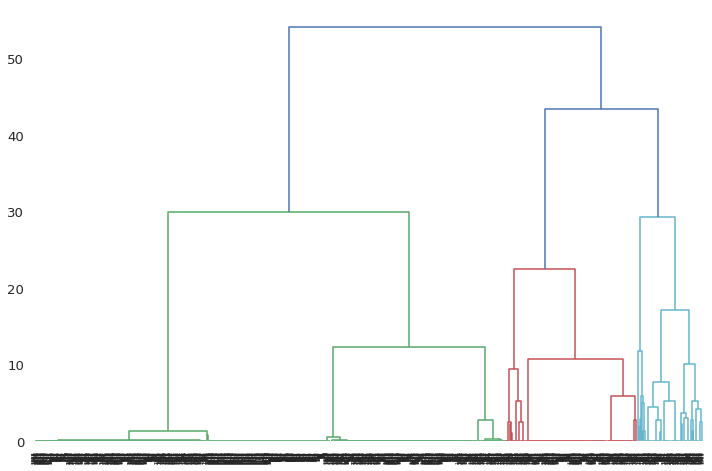

In [ ]:
X = df[df['anomaly']==False].loc[:, ['trust', 'relevance', 'length', 'repetitions']].values
X_sample = X[np.random.choice(X.shape[0], 2000, replace=False), :]
dendrogram = sch.dendrogram(sch.linkage(X_sample, method='ward'))